## Mobile User Behaviour K-Means Clustering Model

In [2]:
# Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
# Loading dataset

df =pd.read_csv("user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [10]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [12]:
# Checking null and duplicate values in the dataset

df.isnull().sum()
df.duplicated().sum()

0

In [14]:
for column in df:
    print(column,"\n",df[column].unique(),'\n')

User ID 
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 

### Exploratory Data Analysis

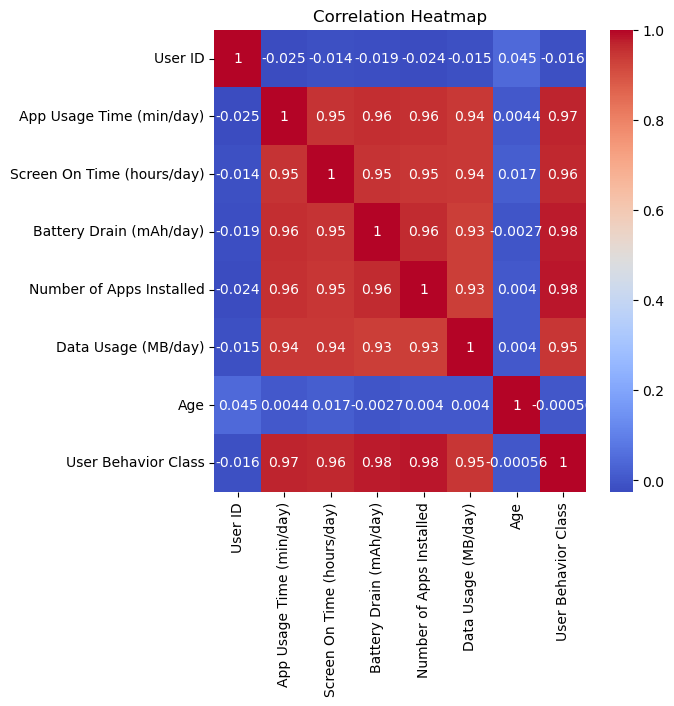

In [17]:
# Correlation Heatmap

plt.figure(figsize =(6,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

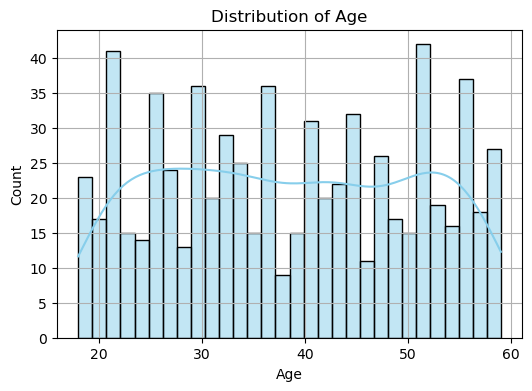

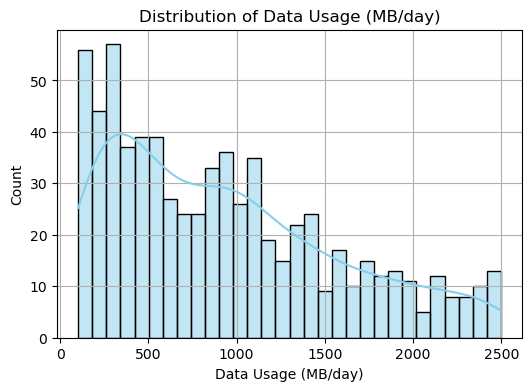

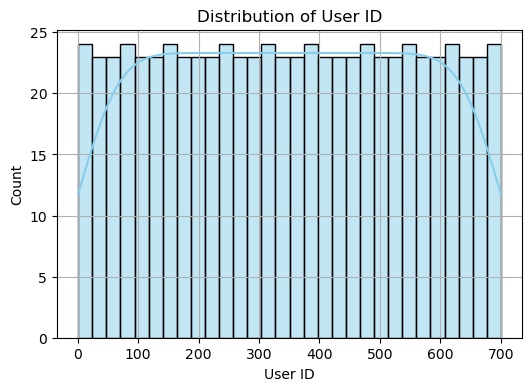

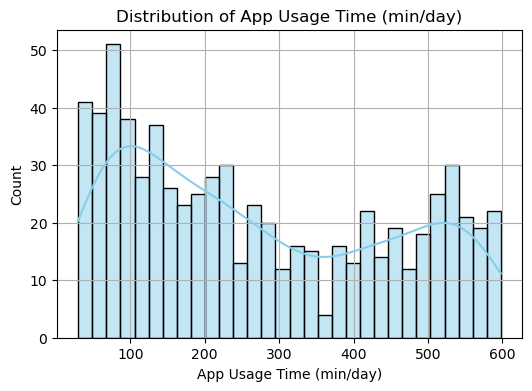

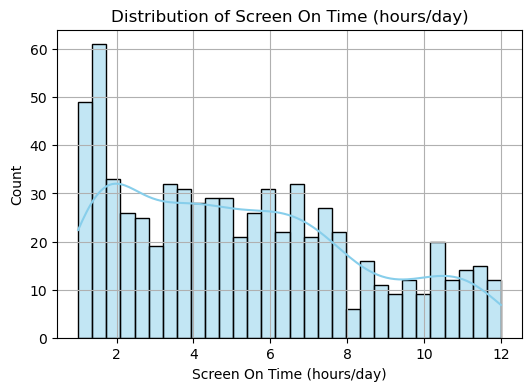

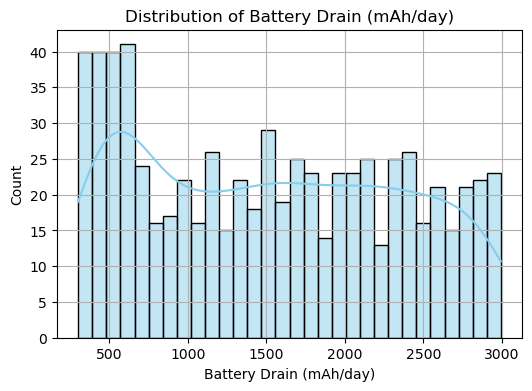

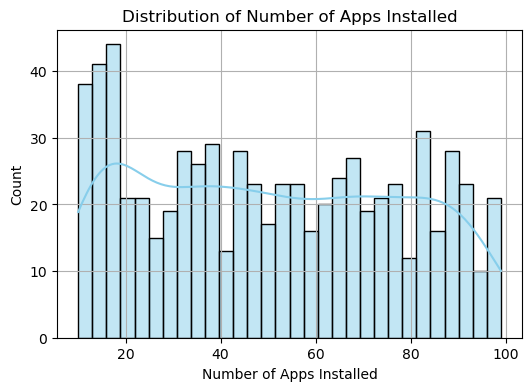

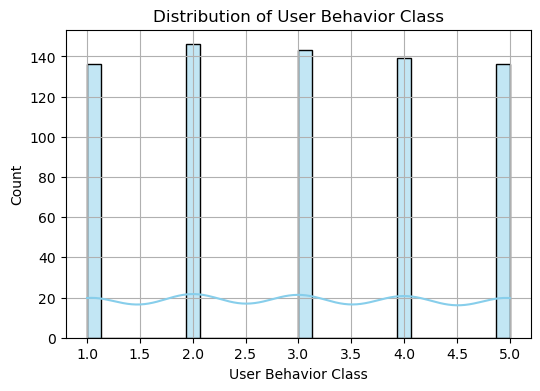

In [25]:
# Numerical column analysis

numeric_cols = ['Age','Data Usage (MB/day)','User ID','App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','User Behavior Class']

for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col], kde = True, bins = 30, color= 'skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17992\1538383523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'Set2')


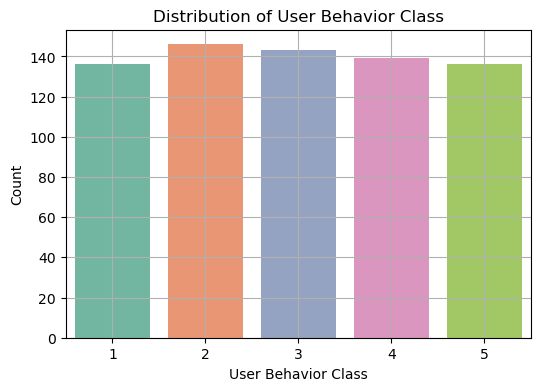

C:\Users\admin\AppData\Local\Temp\ipykernel_17992\1538383523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'Set2')


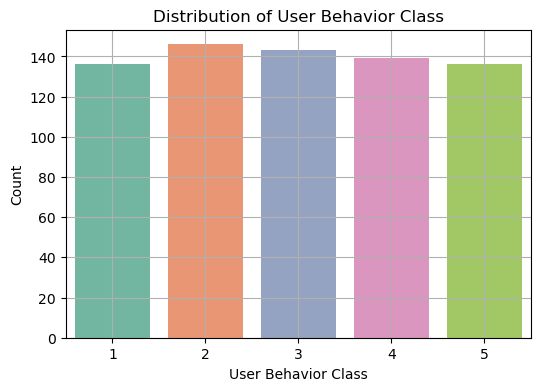

C:\Users\admin\AppData\Local\Temp\ipykernel_17992\1538383523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'Set2')


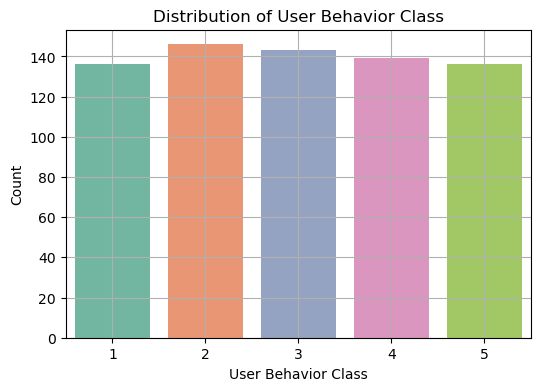

In [27]:
# Categorical column analysis

categorical_cols = ['Device Model','Operating System','Gender']

for cols in categorical_cols:
    plt.figure(figsize = (6,4))
    sns.countplot(x=col, data=df, palette = 'Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

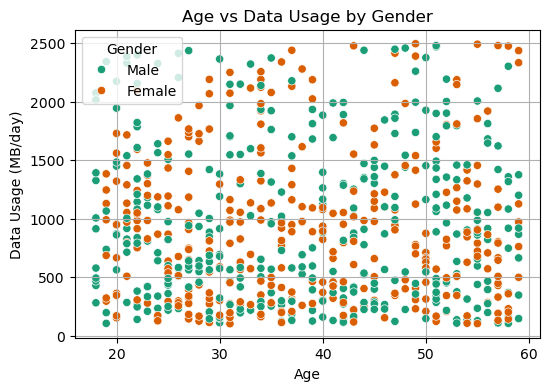

In [33]:
# Age vs Data Usage

plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Age', y = 'Data Usage (MB/day)', hue = 'Gender', data = df, palette = 'Dark2')
plt.title('Age vs Data Usage by Gender')
plt.grid(True)
plt.show()

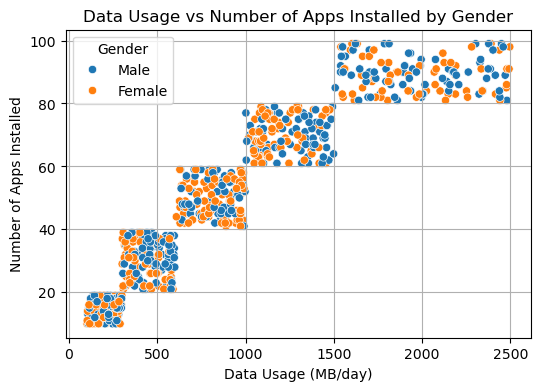

In [35]:
# Data Usage vs Apps Installed

plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Data Usage (MB/day)', y = 'Number of Apps Installed', hue = 'Gender', data = df)
plt.title('Data Usage vs Number of Apps Installed by Gender')
plt.grid(True)
plt.show()

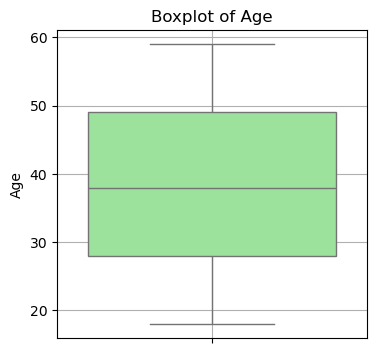

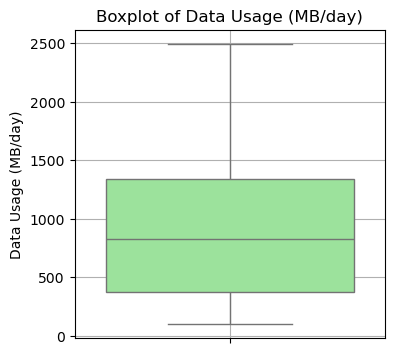

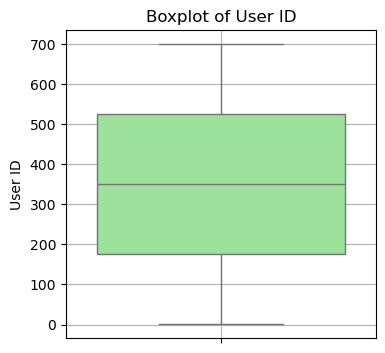

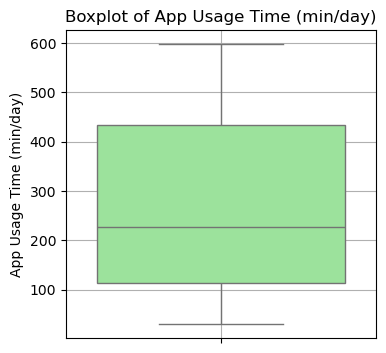

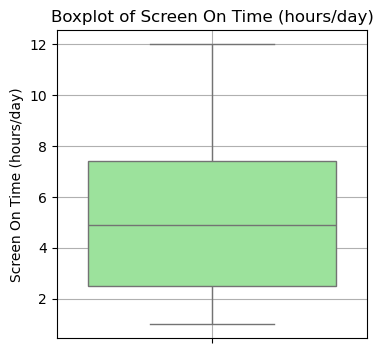

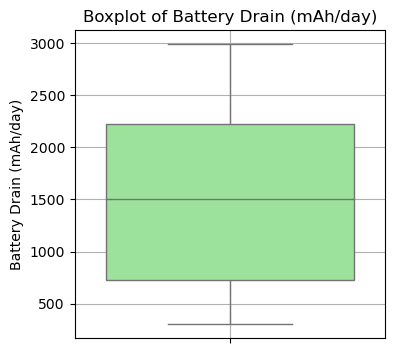

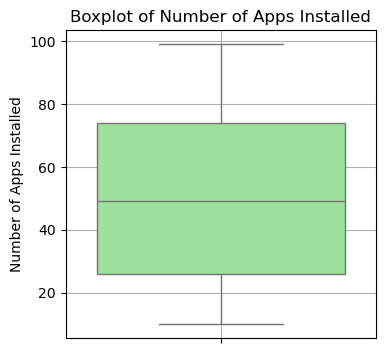

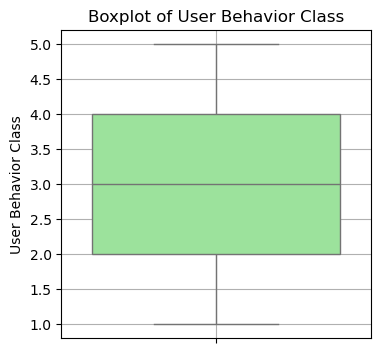

In [46]:
# Boxplot for outliers

for col in numeric_cols:
    plt.figure(figsize = (4,4))
    sns.boxplot(y = df[col], color = 'lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

In [48]:
# Group-wise Statistics

# Average usage by gender
print(df.groupby('Gender')[['Data Usage (MB/day)', 'Number of Apps Installed']].mean())

# Average usage by device model
print(df.groupby('Device Model')[['Data Usage (MB/day)', 'Number of Apps Installed']].mean())

        Data Usage (MB/day)  Number of Apps Installed
Gender                                               
Female           914.321429                 50.226190
Male             943.978022                 51.101648
                    Data Usage (MB/day)  Number of Apps Installed
Device Model                                                     
Google Pixel 5               897.704225                 49.908451
OnePlus 9                    911.120301                 49.969925
Samsung Galaxy S21           931.872180                 50.804511
Xiaomi Mi 11                 940.164384                 49.924658
iPhone 12                    965.506849                 52.726027


### Data Preprocessing

In [53]:
# Encoding categorical variables

df_encoded = pd.get_dummies(df, columns=['Device Model', 'Gender', 'Operating System'], drop_first=True)
df_encoded.head(5)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Gender_Male,Operating System_iOS
0,1,393,6.4,1872,67,1122,40,4,False,False,False,False,True,False
1,2,268,4.7,1331,42,944,47,3,True,False,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,True,False,True,False
3,4,239,4.8,1676,56,871,20,3,False,False,False,False,True,False
4,5,187,4.3,1367,58,988,31,3,False,False,False,True,False,True


In [55]:
# Drop user_id for modeling

features = df_encoded.drop('User ID', axis=1)


In [57]:
# Scale the features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [59]:
#  Elbow Method to Find Optimal k

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

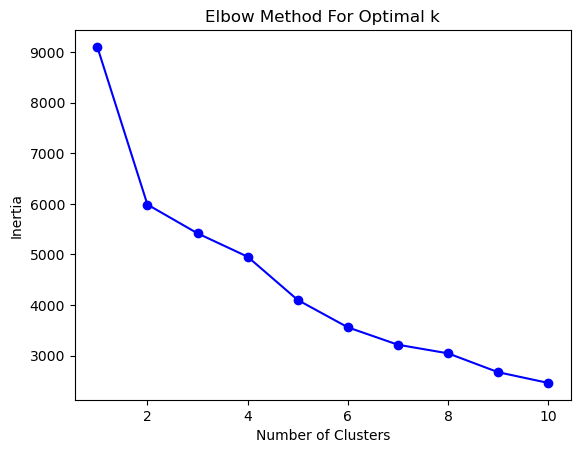

In [61]:
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [63]:
#Apply KMeans with Optimal k (choose based on elbow, e.g., k=4)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [65]:
# Cluster Profiling

print(df['Cluster'].value_counts())

Cluster
0    275
3    223
2    121
1     81
Name: count, dtype: int64


In [67]:
# Mean values per cluster

cluster_profile = df.groupby('Cluster')[['Age', 'Data Usage (MB/day)', 'Number of Apps Installed']].mean()
print(cluster_profile)


               Age  Data Usage (MB/day)  Number of Apps Installed
Cluster                                                          
0        38.429091          1599.450909                 79.480000
1        39.185185           491.432099                 31.308642
2        36.214876           569.132231                 36.388430
3        39.524664           458.744395                 29.959641


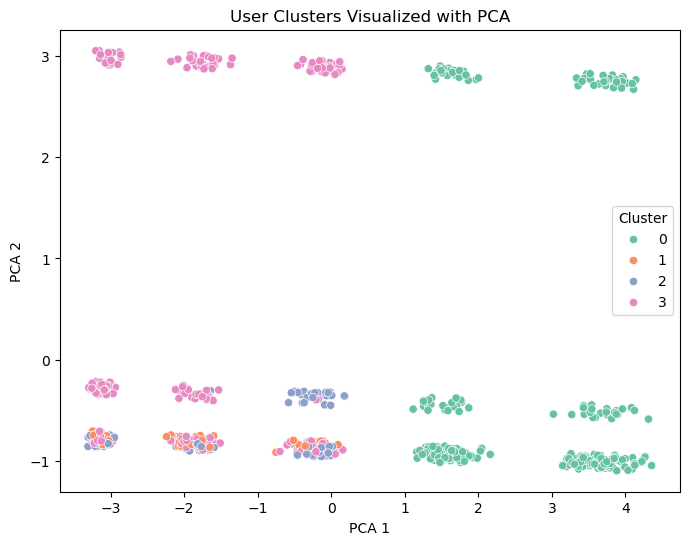

In [69]:
# Visualize Clusters using PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('User Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()